Feito por: Alexandre Alves Andrade

In [1]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [2]:
start = 0
end = 1000
path = "mpd.slice." + str(start) + "-" + str(end-1) + ".json"
d = json.load(open(path, "r"))
thisSlice = pd.DataFrame.from_dict(d['playlists'], orient='columns')

O trecho seguinte foi adaptado do seguinte [código](https://github.com/vaslnk/Spotify-Song-Recommendation-ML/blob/master/EDA.ipynb)

In [3]:
songPlaylistArray = []
for index, row in thisSlice.iterrows():
    for track in row['tracks']:
        songPlaylistArray.append([track['artist_name'], row['pid']])
songPlaylist = pd.DataFrame(songPlaylistArray, columns=['artist_name', 'pid'])

print(songPlaylist.shape)
songPlaylist.head(10) 

(67503, 2)


,artist_name,pid
0,Missy Elliott,0
1,Britney Spears,0
2,Beyoncé,0
3,Justin Timberlake,0
4,Shaggy,0
5,Usher,0
6,Usher,0
7,The Pussycat Dolls,0
8,Destiny's Child,0
9,OutKast,0


#Criando o grafo

In [ ]:
graph = nx.Graph()

playlist = []
for p in range(0, 500):
    playlist_unique_artist = songPlaylist.loc[songPlaylist["pid"] == p].drop_duplicates(subset=['artist_name'])['artist_name'].to_numpy()

    for i in range(0, len(playlist_unique_artist)):
        for j in range(i+1, len(playlist_unique_artist)):
            #Verificar se a existe a aresta
            if(graph.has_edge(playlist_unique_artist[i], playlist_unique_artist[j])):

                graph[playlist_unique_artist[i]][playlist_unique_artist[j]]["peso"] += 1
      
            else:

                graph.add_edge(playlist_unique_artist[i], playlist_unique_artist[j], peso = 1)
                



Foi necessario a exclusão de dois componente não conectados com a maior de rede, e foi feita com a seguinte linha de código.

In [ ]:
largest_comp = [graph.subgraph(c).copy() for c in nx.connected_components(graph)][0]

**Nodes** e **Edges** presente no grafo

In [ ]:
print("{} nodes, {} edges".format(len(largest_comp), nx.number_of_edges(largest_comp)))

6514 nodes, 476858 edges


#Degree

O código seguinte calcula o grau de cada **node** e mostra o respectivo gráfico.

In [ ]:
grau = nx.degree_centrality(largest_comp)
grau_contagem = nx.degree(largest_comp)

graus = []

for artist, centrality in grau.items():
    grau_artist = 0
    for artist_contagem, numero in dict(grau_contagem).items():
        if artist == artist_contagem:
            grau_artist = numero
            break

    graus.append([artist, centrality, grau_artist])



In [ ]:
graus_data = pd.DataFrame(graus, columns=["artist_name", "centrality", "degree"])

graus_data.sort_values(by="degree", ascending=False).head(10)

,artist_name,centrality,degree
344,Drake,0.345258,2239
205,Rihanna,0.320432,2078
431,Kanye West,0.289283,1876
412,The Weeknd,0.279106,1810
357,Kendrick Lamar,0.264919,1718
911,Coldplay,0.254433,1650
871,The Chainsmokers,0.244564,1586
212,Ed Sheeran,0.239013,1550
763,Maroon 5,0.239013,1550
28,Justin Bieber,0.238705,1548


In [ ]:
print("{} nodes, {} edges".format(len(largest_comp), nx.number_of_edges(largest_comp)))

6486 nodes, 476555 edges


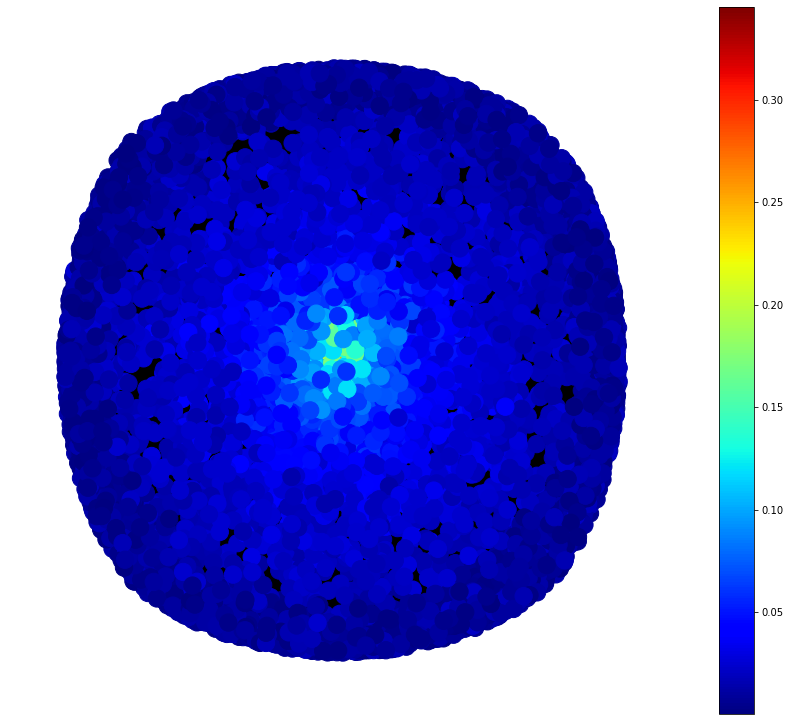

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 13))

pos = nx.spring_layout(largest_comp, k=0.9, iterations=50)
color = list(dict(grau).values())

nx.draw_networkx_edges(largest_comp, alpha=0.7, ax=ax, pos=pos)
nodes = nx.draw_networkx_nodes(largest_comp, node_color=color, cmap=plt.cm.jet, ax=ax, pos=pos)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig("degree.png", transparent=True, dpi=300)
plt.show()

#Closeness

O código seguinte calcula o proximidade de cada **node** e mostra o respectivo gráfico.

In [ ]:
proximidade = nx.closeness_centrality(largest_comp)

In [ ]:
proximidades = []
for artist, prox in dict(proximidade).items():
    proximidades.append([artist, prox])
proximidades_data = pd.DataFrame(proximidades, columns=["artist_name", "proximidade"])

In [ ]:
proximidades_data.sort_values(by="proximidade", ascending=False).head(10)

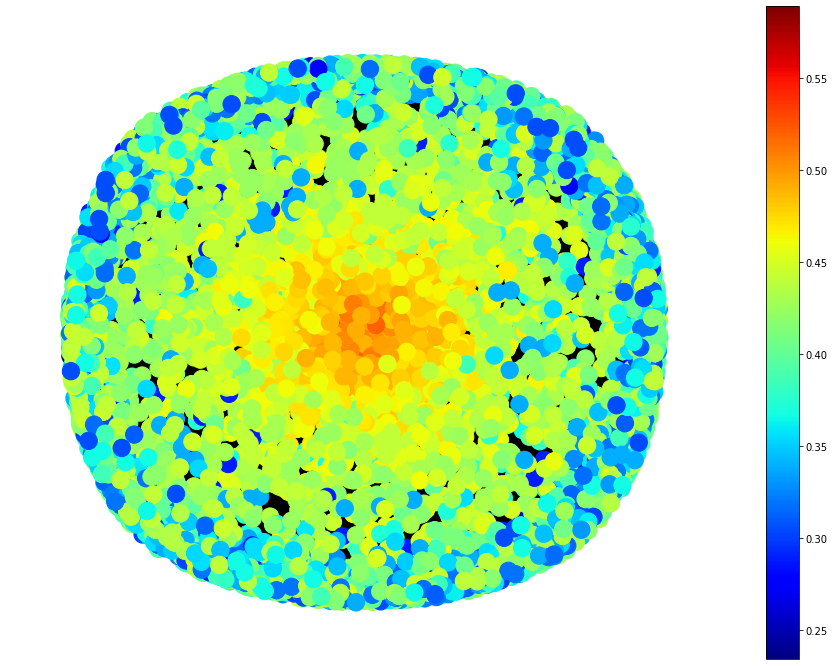

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

pos = nx.spring_layout(largest_comp, k=0.9)
color = list(dict(proximidade).values())

nx.draw_networkx_edges(largest_comp, alpha=0.7, ax=ax, pos=pos)
nodes = nx.draw_networkx_nodes(largest_comp, node_color=color, cmap=plt.cm.jet, ax=ax, pos=pos)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig("degree.png", transparent=True, dpi=300)
plt.show()

#betweenness

O código seguinte calcula o *betweenness* de cada **node** e mostra o respectivo gráfico.

In [ ]:
betweenness = nx.betweenness_centrality(largest_comp)

In [ ]:
betweennessList = []
for artist, betweenness_num in dict(betweenness).items():
    betweennessList.append([artist, betweenness_num])
betweenness_data = pd.DataFrame(betweennessList, columns=["artist_name", "betweenness_num"])

In [ ]:
betweenness_data.sort_values(by="betweenness_num", ascending=False).head(10)

,artist_name,betweenness_num
205,Rihanna,0.036108
344,Drake,0.027904
28,Justin Bieber,0.018725
357,Kendrick Lamar,0.016234
431,Kanye West,0.015648
911,Coldplay,0.015264
412,The Weeknd,0.014797
8,OutKast,0.013534
134,Mariah Carey,0.013262
2318,Seu Jorge,0.012658


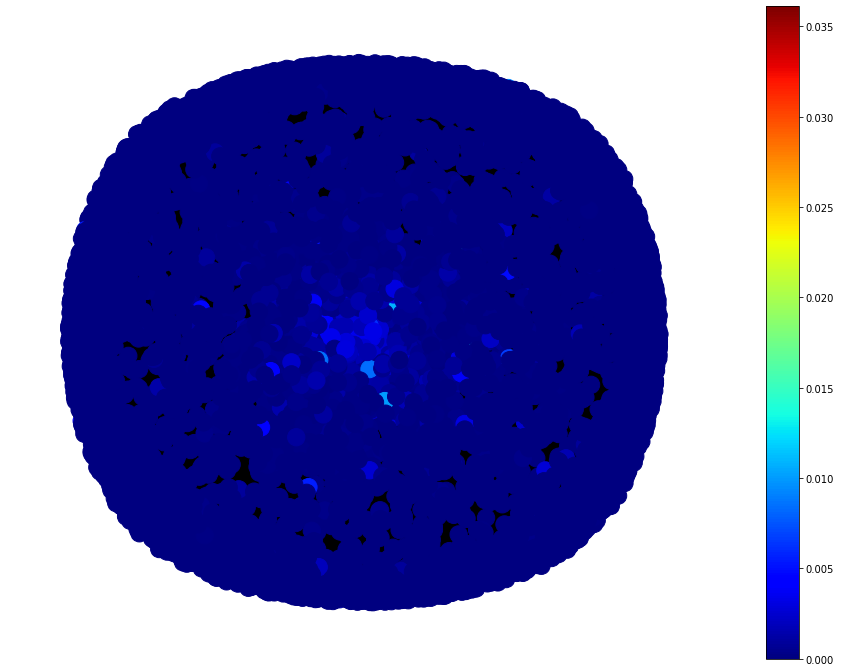

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

pos = nx.spring_layout(largest_comp, k=0.9, iterations=50)
color = list(dict(betweenness).values())

nx.draw_networkx_edges(largest_comp, alpha=0.7, ax=ax, pos=pos)
nodes = nx.draw_networkx_nodes(largest_comp, node_color=color, cmap=plt.cm.jet, ax=ax, pos=pos)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig("degree.png", transparent=True, dpi=300)
plt.show()

#Eigenvector

O código seguinte calcula o *Eigenvector* de cada **node** e mostra o respectivo gráfico.

In [ ]:
eigenvectors = nx.eigenvector_centrality(largest_comp)

In [ ]:
eigenvectorsList = []
for artist, eigenvector_num in dict(eigenvectors).items():
    eigenvectorsList.append([artist, eigenvector_num])
eigenvector_data = pd.DataFrame(eigenvectorsList, columns=["artist_name", "eigenvector_num"])

In [ ]:
eigenvector_data.sort_values(by="eigenvector_num", ascending=False).head(10)

,artist_name,eigenvector_num
344,Drake,0.081142
205,Rihanna,0.079990
412,The Weeknd,0.073714
431,Kanye West,0.073072
763,Maroon 5,0.069069
212,Ed Sheeran,0.068685
871,The Chainsmokers,0.068684
415,Major Lazer,0.067676
28,Justin Bieber,0.067547
357,Kendrick Lamar,0.067043


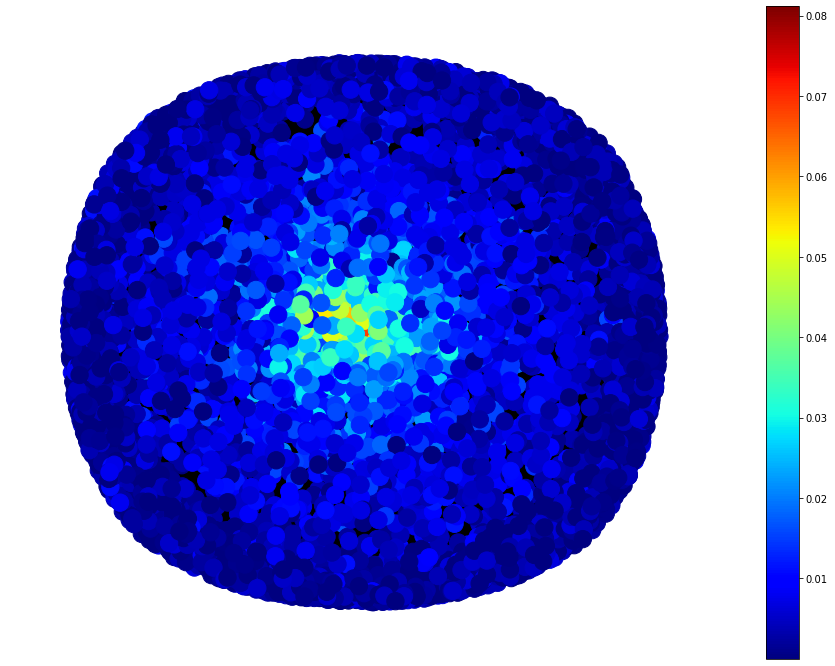

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

pos = nx.spring_layout(largest_comp, k=0.9, iterations=50)
color = list(dict(eigenvectors).values())

nx.draw_networkx_edges(largest_comp, alpha=0.7, ax=ax, pos=pos)
nodes = nx.draw_networkx_nodes(largest_comp, node_color=color, cmap=plt.cm.jet, ax=ax, pos=pos)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig("degree.png", transparent=True, dpi=300)
plt.show()

#Análise Multivariada

In [ ]:
grau = pd.Series(grau)
pro = pd.Series(proximidade)
bet = pd.Series(betweenness)
eig = pd.Series(eigenvectors)

In [ ]:
df = pd.DataFrame.from_dict({"grau": grau, "proximidade": pro, "betweenness": bet, "eigenvectors": eig})
#df.reset_index(inplace=True,drop=True)
df.head()

,grau,proximidade,betweenness,eigenvectors
Missy Elliott,0.116114,0.497087,0.001396,0.041591
Britney Spears,0.118119,0.497927,0.000937,0.047295
Beyoncé,0.204318,0.535641,0.004952,0.063871
Justin Timberlake,0.152660,0.522773,0.002653,0.054382
Shaggy,0.123516,0.498885,0.000944,0.048394


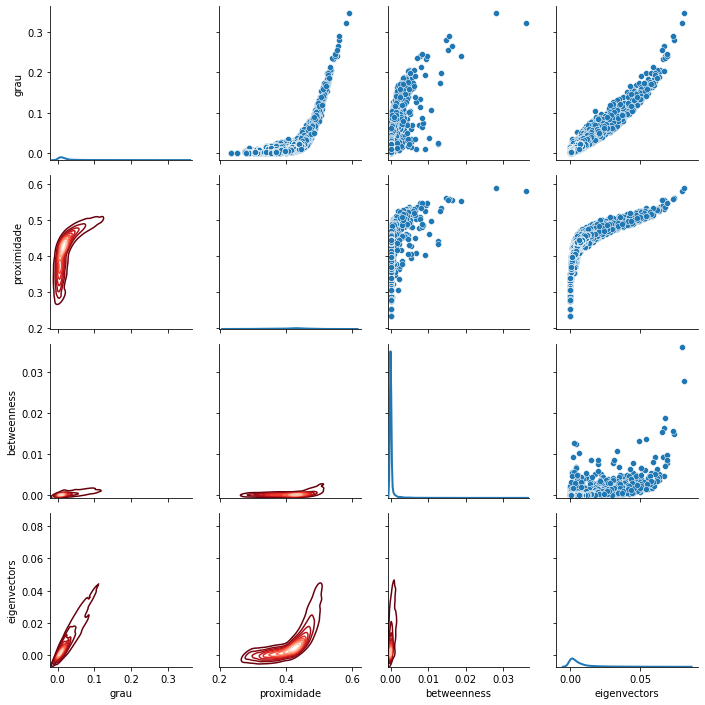

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.show()